In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import fastai
import torch
from fastai.vision.all import *
from PIL import Image
import cv2
from fastai.metrics import accuracy, F1Score, Recall
from fastai.interpret import ClassificationInterpretation

fastai.__version__

# defaults.device = torch.device('cuda') # makes sure the gpu is used

In [ ]:
dir(fastai.vision.models)

In [3]:
path = Path('/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train')
path.ls()

(#3) [Path('/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train/good'),Path('/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train/ng'),Path('/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train/.ipynb_checkpoints')]

In [8]:
folders = ['good', 'ng']
files = []
for folder in folders:
    files += get_image_files(path/folder)

# dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
#                    get_items=lambda x: files,
#                    get_y=lambda o: o.parent.name,
#                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
#                    item_tfms=[Resize(224)],
#                    batch_tfms=[*aug_transforms(size=224,
#                                                max_rotate=2.0,
#                                                min_zoom=0.9,
#                                                max_zoom=1.1,
#                                                max_lighting=0.3,
#                                                max_warp=0.2,
#                                                p_affine=0.2,
#                                                p_lighting=0.1),
#                                Rotate(draw=5.0, p=0.9),
#                                Dihedral(p=0.1),
#                                RandomResizedCrop(320, min_scale=0.9),
#                                Resize(224),
#                                Normalize.from_stats(*imagenet_stats)])

# DataBlock 정의
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(480),
                   batch_tfms=[*aug_transforms(size=480,
                                               max_rotate=2.0,
                                               min_zoom=0.9,
                                               max_zoom=1.1,
                                               max_lighting=0.3,
                                               max_warp=0.2,
                                               p_affine=0.2,
                                               p_lighting=0.1),
                               Normalize.from_stats(*imagenet_stats)])



dls = dblock.dataloaders(path, bs=16)

In [7]:
# 첫 번째 이미지를 가져와서 크기를 확인
img = PILImage.create(dls.train_ds.items[0])
print(img.size)

# item_tfms 적용 후 크기 확인
img = Resize(480)(img)
print(img.size)


(1024, 1024)
(480, 480)


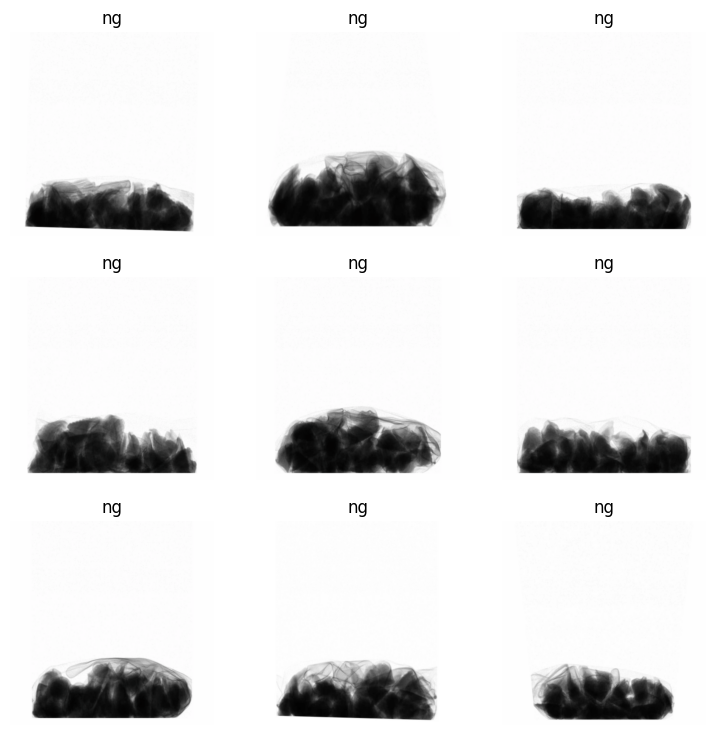

In [5]:
dls.show_batch()

In [9]:
print(dls.train_ds[0][0].shape)

(1024, 1024)


In [12]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(480),
                   batch_tfms=[*aug_transforms(
                                               max_rotate=2.0,
                                               min_zoom=0.9,
                                               max_zoom=1.1,
                                               max_lighting=0.3,
                                               max_warp=0.2,
                                               p_affine=0.2,
                                               p_lighting=0.1),
                               Normalize.from_stats(*imagenet_stats)])


dls = dblock.dataloaders(path, bs=16)

print(dls.train_ds[0][0].shape)

(1024, 1024)


In [14]:
# 최소한의 DataBlock 설정으로 시작
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(480))

# DataLoader 생성
dls = dblock.dataloaders(path, bs=8)

# 이미지 크기 확인
print(dls.train_ds[0][0].shape)


(1024, 1024)


In [15]:
fastai.__version__

'2.7.12'

In [13]:
# EarlyStoppingCallback 정의
early_stop = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.001, patience=10)
# SaveModelCallback 정의
# save_model = SaveModelCallback(monitor='valid_loss', fname='best_model')

learn = cnn_learner(dls, efficientnet_v2_m, metrics=[accuracy, F1Score(), Recall(),Precision()], cbs=[early_stop])

learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [00:03<00:00, 54.8MB/s]


OutOfMemoryError: ignored

In [ ]:
import fastai
import torch
from fastai.vision.all import *
from PIL import Image
import cv2
from fastai.metrics import accuracy, F1Score, Recall
from fastai.interpret import ClassificationInterpretation
from fastai.callback.tracker import EarlyStoppingCallback, SaveModelCallback

# FastAI 버전 확인
print(fastai.__version__)

# GPU 사용 설정
defaults.device = torch.device('cuda')

# 데이터 경로 설정
path = Path('/content/drive/MyDrive/Colab Notebooks/01.ML/01_cj_project/datasets/img_cls/fm_img_hori/train')

# 폴더와 파일 목록 생성
folders = ['good', 'ng']
files = []
for folder in folders:
    files += get_image_files(path/folder)

# DataBlock 정의
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(224),
                   batch_tfms=[*aug_transforms(size=224,
                                               max_rotate=2.0,
                                               min_zoom=0.9,
                                               max_zoom=1.1,
                                               max_lighting=0.3,
                                               max_warp=0.2,
                                               p_affine=0.2,
                                               p_lighting=0.1),
                               Normalize.from_stats(*imagenet_stats)])

# DataLoader 생성
dls = dblock.dataloaders(path, bs=16)

# Callbacks 정의
early_stop = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.001, patience=10)


In [ ]:

# 모델 학습
learn = cnn_learner(dls, efficientnet_v2_l, metrics=[accuracy, F1Score(), Recall()], cbs=[early_stop])
learn.fine_tune(10)

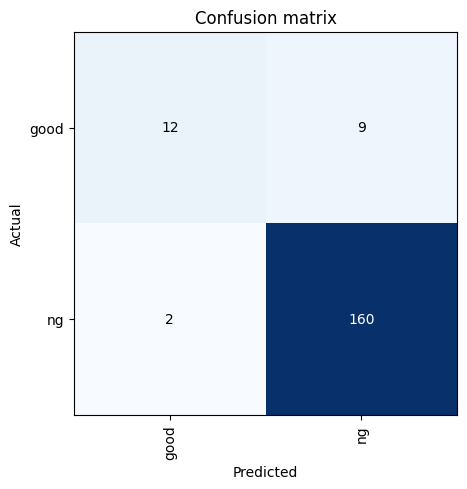

In [ ]:
# 예측값과 실제값 추출
interp = ClassificationInterpretation.from_learner(learn)
preds, targs = interp.top_losses()

interp.plot_confusion_matrix()

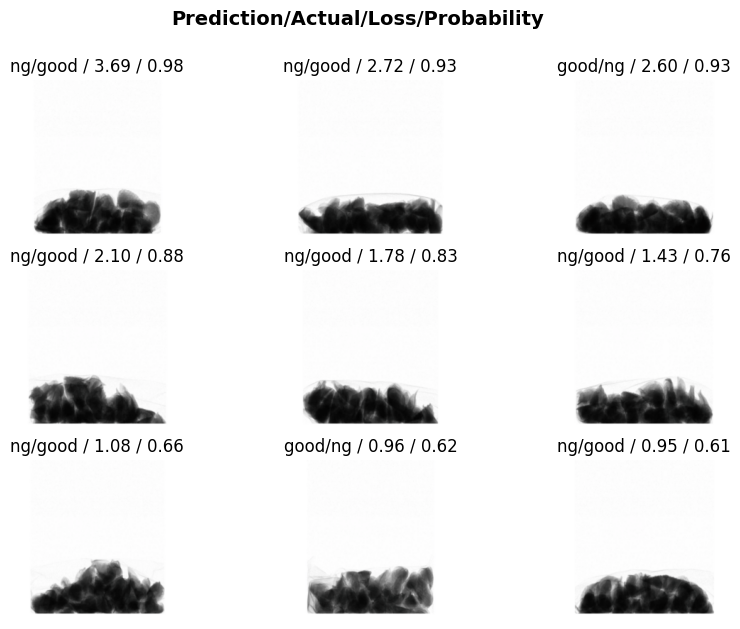

In [ ]:
# 오답 결과 시각화
interp.plot_top_losses(9, figsize=(10,7))

In [ ]:
import pandas as pd

# 결과를 저장할 DataFrame 생성
results_df = pd.DataFrame(columns=['Model', 'Run', 'Train Loss', 'Valid Loss', 'Accuracy', 'F1 Score', 'Recall'])

# 모델 리스트
models = [efficientnet_v2_l, resnet101, mobilenet_v2, mobilenet_v3_large, densenet161]

# 각 모델을 5번 학습
for model in models:
    for run in range(1, 6):
        # 모델 학습
        learn = cnn_learner(dls, model, metrics=[accuracy, F1Score(), Recall()], cbs=[early_stop])
        learn.fine_tune(5)

        # 마지막 에포크의 결과 가져오기
        last_epoch = learn.recorder.values[-1]

        # 결과를 DataFrame에 추가
        results_df = results_df.append({
            'Model': str(model).split()[1],
            'Run': run,
            'Train Loss': last_epoch[0],
            'Valid Loss': last_epoch[1],
            'Accuracy': last_epoch[2],
            'F1 Score': last_epoch[3],
            'Recall': last_epoch[4]
        }, ignore_index=True)

# 결과 출력
print(results_df)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


NameError: ignored